In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [2]:
df_tn = pd.read_csv('data/tn.movie_budgets.csv.gz')
df_tn.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [12]:
#df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].map(lambda x: x.strip('$')).str.replace(',','')
df_tn['production_budget'] = df_tn['production_budget'].map(lambda x: x.strip('$')).str.replace(',','')
df_tn['domestic_gross'] = df_tn['domestic_gross'].map(lambda x: x.strip('$')).str.replace(',','')
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].map(lambda x: x.strip('$')).str.replace(',','')
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [21]:
df_tn.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [52]:
df_tn['production_budget'] = list(df_tn['production_budget'].astype(float))
df_tn['worldwide_gross'] = list(df_tn['worldwide_gross'].astype(float))
df_tn['domestic_gross'] = list(df_tn['domestic_gross'].astype(float))
df_tn.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08


In [60]:
df_tn['profit'] = df_tn['worldwide_gross'] - df_tn['production_budget']
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


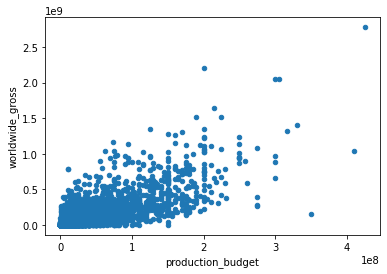

In [54]:
ax1 = df_tn.plot.scatter(x='production_budget', y='worldwide_gross');

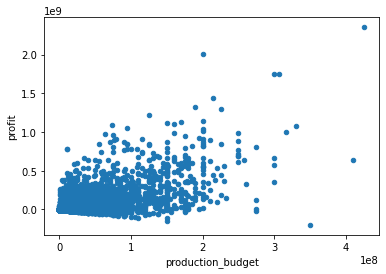

In [62]:
ax1 = df_tn.plot.scatter(x='production_budget', y='profit');

In [61]:
dtpc = df_tn.corr()
dtpc

,id,production_budget,domestic_gross,worldwide_gross,profit
id,1.000000,-0.035278,0.008255,-0.009422,-0.001172
production_budget,-0.035278,1.000000,0.685682,0.748306,0.608752
domestic_gross,0.008255,0.685682,1.000000,0.938853,0.926605
worldwide_gross,-0.009422,0.748306,0.938853,1.000000,0.981811
profit,-0.001172,0.608752,0.926605,0.981811,1.000000


In [51]:
#wwg = list(df_tn['worldwide_gross'].astype(float, errors='ignore'))
#wwg

In [50]:
#dg = list(df_tn['domestic_gross'].astype(float))
#dg

In [3]:
df_bom =  pd.read_csv('data/bom.movie_gross.csv.gz')
df_bom.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [4]:
df_imdb_titles = pd.read_csv('data/imdb.title.basics.csv.gz')
df_imdb_titles.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [5]:
tnim3 = df_tn[df_tn['movie'] == 'Iron Man 3']
tnim3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
47,48,"May 3, 2013",Iron Man 3,"$200,000,000","$408,992,272","$1,215,392,272"


In [37]:
# df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
# tnim3['production_budget'] = tnim3['production_budget'].map(lambda x: x.strip('$')).astype(float)

AttributeError: 'float' object has no attribute 'strip'

In [29]:
# def round_up(n, decimals=0):
#    multiplier = 10 ** decimals
#    return math.ceil(n * multiplier) / multiplier
def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier
round_up(1352, -6)

1000000.0

In [18]:
bomim3 = df_bom[df_bom['title'] == 'Iron Man 3']
bomim3

,title,studio,domestic_gross,foreign_gross,year
1128,Iron Man 3,BV,409000000.0,805800000,2013
